<a href="https://colab.research.google.com/github/hyeonsang010716/huggingface-study/blob/main/1_huggingface_guide_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

파이토치 GPU 가속 확인

In [ ]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())

2.4.1+cu121
True


허깅 페이스 라이브러리 설치 (의존성 문제 해결)

In [ ]:
!pip install fsspec==2024.5.0
!pip install gcsfs==2024.5.0
!pip install transformers[torch]==4.41.2 datasets==2.20.0

# 허깅페이스 모델 드리블

허깅페이스 모델 다운로드 확인

In [ ]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
import torch
from datasets import load_dataset

dataset = load_dataset("huggingface/cats-image", trust_remote_code=True)
image = dataset["test"]["image"][0]

image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-18")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-18")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating test split: 0 examples [00:00, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

tabby, tabby cat


PretrainedConfig 클래스 : transformer 하이퍼파라미터

```
config = transformers.PretrainedConfig(
    model_type: str,
    vocab_size: int,
    hidden_size: int,
    num_attention_heads: int,
    num_hidden_layers: int,
    output_hidden_states: bool = False,
    output_attentions: bool = False,
    return_dict: bool = True,
    is_encoder_decoder: bool = False,
    is_decoder: bool = False
)

```

**vocab_size**: 모델의 어휘 사전 크기입니다. 모델이 인식할 수 있는 고유 토큰의 수를 결정합니다.

**hidden_size**: 모델의 은닉 계층에 있는 노드의 수입니다. 이 값이 클수록 모델의 표현 능력이 높아집니다.

**num_attention_heads**: 모델의 멀티 헤드 어텐션에서 사용하는 어텐션 헤드의 수입니다.

**num_hidden_layers**: 모델의 트랜스포머 계층 수입니다. 계층의 수가 많을수록 모델의 표현 능력이 높아집니다.

**output_hidden_states**: 모델이 모든 은닉 상태를 출력할지를 결정합니다.

**output_attentions**: 모델이 모든 어텐션 점수를 출력할지를 결정합니다.

**return_dict**: 모델이 일반 튜플 대신 ModelOutput 객체를 반환할지를 결정합니다.

**is_encoder_decoder**: 모델이 인코더-디코더 모델인지를 나타냅니다.

**is_decoder**: 모델이 디코더 모델인지를 나타냅니다.



PretrainedConfig 클래스 사용 예시

In [ ]:
from transformers import PretrainedConfig

config = PretrainedConfig(
    model_type="bert",
    vocab_size=30522,
    hidden_size=768,
    num_attention_heads=12,
    num_hidden_layers=12,
    intermediate_size=3072,
    hidden_act="gelu",
    hidden_dropout_prob=0.1,
    initializer_range=0.02
)

print(config)

PretrainedConfig {
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "transformers_version": "4.41.2",
  "vocab_size": 30522
}



하지만 보통 직접적인 하이퍼파라미터 세팅 보다는 사전의 만들어져있는 하이퍼파라미터를 가져온느 것이 일반적이다.

In [ ]:
from transformers import PretrainedConfig

config = PretrainedConfig.from_pretrained(
    pretrained_model_name_or_path="google-bert/bert-base-uncased",
    hidden_act="swish"
)

print(config)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

You are using a model of type bert to instantiate a model of type . This is not supported for all configurations of models and can yield errors.


PretrainedConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "swish",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



모델에 맞는 하이퍼파라미터를 가져올 수도 있다.

예시 : BERT

In [ ]:
from transformers import BertConfig

config = BertConfig(
    num_hidden_layers=12,
    num_attention_heads=12
)

print(config)


BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



Tokenizer



*   BERT : BertTokenizer
*   RoBERTa : RobertaTokenizer
*   GPT2-2 : GPT2Tokenizer



In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
text = "I am learning about tokenizers."
encoded = tokenizer.encode(text, add_special_tokens=True)

print(encoded)
print(tokenizer.decode(encoded))


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

[101, 1045, 2572, 4083, 2055, 19204, 17629, 2015, 1012, 102]
[CLS] i am learning about tokenizers. [SEP]


Tokenizer 와 Model

In [ ]:
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
text = "I am learning about tokenizers."
input = tokenizer(text, return_tensors="pt")
print(input)

model = BertModel.from_pretrained("bert-base-uncased")
output = model(**input)
print(output.last_hidden_state.shape)


{'input_ids': tensor([[  101,  1045,  2572,  4083,  2055, 19204, 17629,  2015,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

torch.Size([1, 10, 768])


Model Tuning

In [ ]:
import torch.nn as nn
from transformers import BertModel

class BertClassifier(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(0.3)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output.pooler_output
        dropout_output = self.dropout(pooled_output)
        logits = self.classifier(dropout_output)
        return logits


BertForMaskedLM를 사용해서 단어 예측

In [ ]:
import torch
from torch.nn import functional as F
from transformers import BertTokenizer, BertForMaskedLM

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased", return_dict=True)

text = f"I {tokenizer.mask_token} learning about tokenizers."
input = tokenizer(text, return_tensors="pt")
output = model(**input)

mask_index = torch.where(input["input_ids"][0] == tokenizer.mask_token_id)
softmax = F.softmax(output.logits, dim=-1)
mask_word = softmax[0, mask_index, :]
top10 = torch.topk(mask_word, 10, dim=1)[1][0]

for token in top10:
    word = tokenizer.decode([token])
    sentence = text.replace(tokenizer.mask_token, word)
    print(sentence)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


I was learning about tokenizers.
I am learning about tokenizers.
I remember learning about tokenizers.
I started learning about tokenizers.
I keep learning about tokenizers.
I kept learning about tokenizers.
I like learning about tokenizers.
I liked learning about tokenizers.
I loved learning about tokenizers.
I love learning about tokenizers.


ImageFeatureExtractor 클래스 : 이미지 특징 추출



In [ ]:
from datasets import load_dataset
from transformers import CLIPFeatureExtractor

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

feature_extractor = CLIPFeatureExtractor.from_pretrained("openai/clip-vit-base-patch32")
inputs = feature_extractor(
    images=image,
    do_resize=True,
    size=512,
    do_center_crop=True,
    crop_size=512,
    return_tensors="pt"
)

print(inputs["pixel_values"].shape)
print(inputs)

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

torch.Size([1, 3, 512, 512])
{'pixel_values': tensor([[[[ 0.5143,  0.5727,  0.6603,  ..., -0.0259, -0.1280, -0.0696],
          [ 0.5435,  0.6165,  0.6603,  ...,  0.0325,  0.0179, -0.0113],
          [ 0.5435,  0.5873,  0.6019,  ...,  0.0179,  0.0179,  0.1347],
          ...,
          [ 1.8135,  1.8573,  1.9157,  ...,  1.4778,  1.4486,  1.5654],
          [ 1.9157,  1.8573,  1.8865,  ...,  1.2588,  1.1712,  1.6238],
          [ 1.8719,  1.8573,  1.9011,  ...,  1.1712,  1.4486,  1.5654]],

         [[-1.4069, -1.3469, -1.2568,  ..., -1.4970, -1.5870, -1.4970],
          [-1.3769, -1.2718, -1.2268,  ..., -1.4519, -1.4369, -1.4519],
          [-1.3469, -1.2718, -1.2418,  ..., -1.5120, -1.4669, -1.3769],
          ...,
          [ 0.0789,  0.0939,  0.1389,  ..., -0.6565, -0.6565, -0.5665],
          [ 0.1689,  0.1089,  0.0789,  ..., -0.8816, -0.9117, -0.4164],
          [ 0.0939,  0.0789,  0.1239,  ..., -0.9117, -0.5965, -0.4464]],

         [[-0.6839, -0.5275, -0.3426,  ..., -0.8545, -0.

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


AudioFeatureExtractor 클래스 : 오디오 특징 추출

In [ ]:
from datasets import load_dataset
from transformers import Wav2Vec2FeatureExtractor

dataset = load_dataset("PolyAI/minds14", "ko-KR", split="train", trust_remote_code=True)
audios = [audio["array"] for audio in dataset["audio"][:2]]

feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/wav2vec2-base-960h")
inputs = feature_extractor(
    raw_speech=audios,
    padding=True,
    return_attention_mask=True,
    return_tensors="pt"
)

print(inputs["input_values"][0].shape)
print(inputs["input_values"][1].shape)
print(inputs)

Generating train split: 0 examples [00:00, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


torch.Size([70315])
torch.Size([70315])
{'input_values': tensor([[2.3359e-03, 2.8042e-05, 2.8042e-05,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4663e-03, 1.6907e-04, 1.6907e-04,  ..., 1.3358e-02, 1.3358e-02,
         1.0061e-02]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)}


ImageProcessor 클래스 : 이미지를 전처리 하기 위한 도구

In [ ]:
from datasets import load_dataset
from transformers import CLIPImageProcessor

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]

image_processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")
pixel_values = image_processor(
    images=image,
    image_mean=[0.48145466, 0.4578275, 0.40821073],
    image_std=[0.26862954, 0.26130258, 0.27577711],
    do_convert_rgb=True,
    return_tensors="pt"
)

print(pixel_values["pixel_values"].shape)
print(pixel_values)

torch.Size([1, 3, 224, 224])
{'pixel_values': tensor([[[[ 0.5873,  0.5873,  0.6165,  ...,  0.0617,  0.0471, -0.0259],
          [ 0.5727,  0.5727,  0.6603,  ...,  0.1201,  0.0763,  0.0909],
          [ 0.5873,  0.5435,  0.6165,  ...,  0.0325,  0.1201,  0.0617],
          ...,
          [ 1.8719,  1.8573,  1.8719,  ...,  1.3902,  1.4340,  1.4194],
          [ 1.8281,  1.8719,  1.8427,  ...,  1.4486,  1.4340,  1.5070],
          [ 1.8573,  1.9011,  1.8281,  ...,  1.3756,  1.3610,  1.4486]],

         [[-1.3169, -1.3019, -1.3169,  ..., -1.4970, -1.4369, -1.4820],
          [-1.2418, -1.2718, -1.2268,  ..., -1.4369, -1.4669, -1.4519],
          [-1.2568, -1.3169, -1.2268,  ..., -1.4669, -1.4069, -1.4519],
          ...,
          [ 0.1239,  0.1089,  0.1239,  ..., -0.7016, -0.6865, -0.6865],
          [ 0.0789,  0.0939,  0.0488,  ..., -0.6565, -0.6865, -0.6115],
          [ 0.0939,  0.1089,  0.0038,  ..., -0.7766, -0.7316, -0.6115]],

         [[-0.4848, -0.4137, -0.3853,  ..., -0.9541, -0.

Auto 클래스 : 모델 설정 , 토크나이저 , 특징 추출기 , 이미지 프로세서 등을 불러오기 위한 간편한 인터페이스

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoFeatureExtractor, AutoImageProcessor

nlp_model_name = "bert-base-uncased"
config = AutoConfig.from_pretrained(nlp_model_name)
tokenizer = AutoTokenizer.from_pretrained(nlp_model_name)
model = AutoModel.from_pretrained(nlp_model_name)

vision_model_name = "microsoft/resnet-18"
feature_extractor = AutoFeatureExtractor.from_pretrained(vision_model_name)
image_processor = AutoImageProcessor.from_pretrained(vision_model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(


오토 클래스 자연어 처리

In [ ]:
from transformers import AutoModel, AutoTokenizer

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

text = "I am learning about tokenizers."
input = tokenizer(text, return_tensors="pt")
output = model(**input)

print(output.last_hidden_state.shape)

torch.Size([1, 10, 768])


오토 클래스 컴퓨터 비전

In [ ]:
from PIL import Image
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModel

model_name = "microsoft/resnet-18"  # "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0]
inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([1, 512, 7, 7])


오토 클래스 오디오 모델

In [ ]:
from datasets import load_dataset
from transformers import AutoFeatureExtractor

model_name = "facebook/wav2vec2-base-960h"  # "openai/whisper-tiny"
feature_extractor = AutoFeatureExtractor.from_pretrained(model_name)
dataset = load_dataset("PolyAI/minds14", "ko-KR", split="train")
audios = [audio["array"] for audio in dataset["audio"][:2]]
inputs = feature_extractor(raw_speech=audios, padding=True, return_tensors="pt")
print(inputs.keys())


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


dict_keys(['input_values'])


# 파이프 라인

자연어 처리 파이프 라인

입력 -> 토크나이저 -> 모델 -> 후처리 -> 출력

자연어 처리 파이프라인 예시 1

In [ ]:
import torch
import torch.nn.functional as F
from transformers import pipeline

pipe = pipeline(
    task="text-classification",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

raw_text = [
    "I love you.",
    "I hate you.",
    "I meet with you."
]

inputs = pipe.tokenizer(raw_text, padding=True, return_tensors="pt")
outputs = pipe.model(inputs["input_ids"])
probabilities = F.softmax(outputs.logits, dim=1)
prediction = []
for prob in probabilities:
    max_idx = torch.argmax(prob).item()
    class_name = pipe.model.config.id2label[max_idx]
    score = prob[max_idx].item()
    prediction.append({"label": class_name, "score": score})

print("- raw text:")
print(raw_text)

print("- input_ids:")
print(inputs["input_ids"])

print("- logits:")
print(outputs["logits"])

print("- prediction:")
print(prediction)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


- raw text:
['I love you.', 'I hate you.', 'I meet with you.']
- input_ids:
tensor([[   0,  100,  657,   47,    4,    2,    1],
        [   0,  100, 4157,   47,    4,    2,    1],
        [   0,  100,  972,   19,   47,    4,    2]])
- logits:
tensor([[-2.0258, -0.1874,  2.1731],
        [ 1.8399, -0.1446, -2.0278],
        [-2.1637,  1.7777, -0.0226]], grad_fn=<AddmmBackward0>)
- prediction:
[{'label': 'positive', 'score': 0.901401698589325}, {'label': 'negative', 'score': 0.8632898330688477}, {'label': 'neutral', 'score': 0.8441130518913269}]


자연어 처리 파이프라인 예제 2

In [ ]:
from transformers import pipeline

pipe = pipeline(
    task="text-classification",
    model="cardiffnlp/twitter-roberta-base-sentiment-latest"
)

raw_text = [
    "I love you.",
    "I hate you.",
    "I meet with you."
]

prediction = pipe(raw_text)
print(prediction)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'positive', 'score': 0.9286843538284302}, {'label': 'negative', 'score': 0.8841348886489868}, {'label': 'neutral', 'score': 0.8441128730773926}]


자연어 처리 파이프라인 예제 3

In [ ]:
import torch
from transformers import pipeline

pipe = pipeline(
    task="text-generation",
    model="openai-community/gpt2",  # google-bert/bert-base-uncased
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    torch_dtype=torch.bfloat16
)

inputs = "I am learning about tokenizers."

outputs = pipe(inputs)
print(outputs)


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am learning about tokenizers. When I was working on the ICO, we started a project called Blockchain Miners. Its name meant that we would sell the work on one token and the project was called DnV. You should never be selling'}]


컴퓨터 비전 파이프라인 예제1

In [ ]:
from datasets import load_dataset
from transformers import pipeline

pipe = pipeline(
    task="image-classification",
    model="google/vit-base-patch16-224",
    model_kwargs={
        "hidden_act": "gelu"  # relu
    }
)

dataset = load_dataset("huggingface/cats-image")
inputs = dataset["test"]["image"][0]
outputs = pipe(inputs)
print(outputs)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


[{'label': 'Egyptian cat', 'score': 0.9374417066574097}, {'label': 'tabby, tabby cat', 'score': 0.03844258561730385}, {'label': 'tiger cat', 'score': 0.014411445707082748}, {'label': 'lynx, catamount', 'score': 0.0032743182964622974}, {'label': 'Siamese cat, Siamese', 'score': 0.0006795928347855806}]


허깅페이스 데이터 셋 불러오기

예제 1

In [ ]:
from datasets import load_dataset

dataset1 = load_dataset(path="squad")

dataset2 = load_dataset(path="squad", split="train[:10]+validation[:10]")

print(dataset1)
print(dataset2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})
Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 20
})


예제2 데이터 셋 선택, 분리, 병합

In [ ]:
from datasets import load_dataset
from datasets import concatenate_datasets

dataset = load_dataset("squad", split="train[:10]")

chunk1 = dataset.select([0, 1])
chunk2 = dataset.shard(num_shards=2, index=0)
chunk3 = dataset.shard(num_shards=2, index=1)
concat_dataset = concatenate_datasets([chunk1, chunk2, chunk3])

print(len(chunk1))
print(len(chunk2))
print(len(chunk3))
print(len(concat_dataset))

2
5
5
12


데이터 셋 filter 와 map

In [ ]:
from datasets import load_dataset
from transformers import BertTokenizer

def filter_short_context(data):
    return len(data["context"]) <= 1024

def tokenize_function(tokenizer, data):
    inputs = [
        f"{question} [SEP] {context}"
        for question, context in zip(data["question"], data["context"])
    ]
    model_inputs = tokenizer(
        inputs,
        max_length=512,
        padding="max_length",
        truncation=True,
        return_tensors="pt"
    )
    return model_inputs

dataset = load_dataset("squad", split="train[:10]")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

filtered_dataset = dataset.filter(filter_short_context)
tokenized_dataset = filtered_dataset.map(
    lambda x: tokenize_function(tokenizer, x),
    batched=True,
    remove_columns=dataset.column_names
)

tokenized_dataset.set_format(
    type="torch",
    columns=["input_ids", "token_type_ids", "attention_mask"]
)

print(tokenized_dataset)
print(tokenized_dataset[0])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Filter:   0%|          | 0/10 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 5
})
{'input_ids': tensor([  101,  2000,  3183,  2106,  1996,  6261,  2984,  9382,  3711,  1999,
         8517,  1999, 10223, 26371,  2605,  1029,   102,  6549,  2135,  1010,
         1996,  2082,  2038,  1037,  3234,  2839,  1012, 10234,  1996,  2364,
         2311,  1005,  1055,  2751,  8514,  2003,  1037,  3585,  6231,  1997,
         1996,  6261,  2984,  1012,  3202,  1999,  2392,  1997,  1996,  2364,
         2311,  1998,  5307,  2009,  1010,  2003,  1037,  6967,  6231,  1997,
         4828,  2007,  2608,  2039, 14995,  6924,  2007,  1996,  5722,  1000,
         2310,  3490,  2618,  4748,  2033, 18168,  5267,  1000,  1012,  2279,
         2000,  1996,  2364,  2311,  2003,  1996, 13546,  1997,  1996,  6730,
         2540,  1012,  3202,  2369,  1996, 13546,  2003,  1996, 24665, 23052,
         1010,  1037, 14042,  2173,  1997,  7083,  1998,  9185,  1012,  2009,
         2003,  1037, 15059,  1997

map , filter 외에도 허깅페이스에서 제공하는 데이터 셋 함수는 다음과 같이 있습니다.

**열 조작 메서드**

add_column: 새로운 열을 추가합니다.

rename_column: 열 이름을 변경하여 가독성을 높입니다.

remove_columns: 불필요한 열을 제거하여 데이터셋을 간소화합니다.


데이터 정렬 및 섞기 메서드
shuffle: 데이터셋의 순서를 무작위로 섞어 학습 시 편향을 방지합니다.

sort: 특정 기준에 따라 데이터셋을 정렬합니다.

**데이터 형식 변환 메서드**

class_encode_column: 문자형 데이터를 숫자형으로 인코딩합니다.

set_format: 텐서, 넘파이 배열 등으로 데이터를 변환해 모델 입력 형식에 맞춥니다.

**데이터셋 정보 및 특성 확인 메서드**

info: 데이터셋의 기본 정보(열 이름, 데이터 타입 등)를 제공합니다.

unique: 특정 열의 유일한 값을 확인합니다.

KLUE 데이터셋 모델 초기화

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForTokenClassification, AutoTokenizer

dataset = load_dataset("klue", "ner")
labels = dataset["train"].features["ner_tags"].feature.names

model_name = "Leo97/KoELECTRA-small-v3-modu-ner"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    ignore_mismatched_sizes=True
)

print(dataset["train"])
print(dataset["train"][0])
print(labels)


Generating train split:   0%|          | 0/21008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/365 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/263k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/815k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/56.3M [00:00<?, ?B/s]

Some weights of ElectraForTokenClassification were not initialized from the model checkpoint at Leo97/KoELECTRA-small-v3-modu-ner and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([31]) in the checkpoint and torch.Size([13]) in the model instantiated
- classifier.weight: found shape torch.Size([31, 256]) in the checkpoint and torch.Size([13, 256]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Dataset({
    features: ['sentence', 'tokens', 'ner_tags'],
    num_rows: 21008
})
{'sentence': '특히 <영동고속도로:LC> <강릉:LC> 방향 <문막휴게소:LC>에서 <만종분기점:LC>까지 <5㎞:QT> 구간에는 승용차 전용 임시 갓길차로제를 운영하기로 했다.', 'tokens': ['특', '히', ' ', '영', '동', '고', '속', '도', '로', ' ', '강', '릉', ' ', '방', '향', ' ', '문', '막', '휴', '게', '소', '에', '서', ' ', '만', '종', '분', '기', '점', '까', '지', ' ', '5', '㎞', ' ', '구', '간', '에', '는', ' ', '승', '용', '차', ' ', '전', '용', ' ', '임', '시', ' ', '갓', '길', '차', '로', '제', '를', ' ', '운', '영', '하', '기', '로', ' ', '했', '다', '.'], 'ner_tags': [12, 12, 12, 2, 3, 3, 3, 3, 3, 12, 2, 3, 12, 12, 12, 12, 2, 3, 3, 3, 3, 12, 12, 12, 2, 3, 3, 3, 3, 12, 12, 12, 8, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]}
['B-DT', 'I-DT', 'B-LC', 'I-LC', 'B-OG', 'I-OG', 'B-PS', 'I-PS', 'B-QT', 'I-QT', 'B-TI', 'I-TI', 'O']


데이터 전처리

In [ ]:
def preprocess_data(example, tokenizer):
    sentence = "".join(example["tokens"]).replace("\xa0", " ")
    encoded = tokenizer(
        sentence,
        return_offsets_mapping=True,
        add_special_tokens=False,
        padding=False,
        truncation=False
    )

    labels = []
    for offset in encoded.offset_mapping:
        if offset[0] == offset[1]:
            labels.append(-100)
        else:
            labels.append(example["ner_tags"][offset[0]])

    encoded["labels"] = labels
    return encoded

processed_dataset = dataset.map(
    lambda example: preprocess_data(example, tokenizer),
    batched=False,
    remove_columns=dataset["train"].column_names,
)

print(processed_dataset)
print(dataset["train"][0]["ner_tags"])
print(processed_dataset["train"][0]["offset_mapping"])
print(processed_dataset["train"][0]["labels"])


Map:   0%|          | 0/21008 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'labels'],
        num_rows: 21008
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'labels'],
        num_rows: 5000
    })
})
[12, 12, 12, 2, 3, 3, 3, 3, 3, 12, 2, 3, 12, 12, 12, 12, 2, 3, 3, 3, 3, 12, 12, 12, 2, 3, 3, 3, 3, 12, 12, 12, 8, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
[[0, 2], [3, 9], [10, 12], [13, 15], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29], [29, 30], [30, 31], [32, 33], [33, 34], [35, 37], [37, 38], [38, 39], [40, 43], [44, 46], [47, 49], [50, 51], [51, 52], [52, 53], [53, 54], [54, 55], [55, 56], [57, 59], [59, 60], [60, 61], [61, 62], [63, 64], [64, 65], [65, 66]]
[12, 2, 2, 12, 2, 3, 3, 3, 3, 12, 12, 2, 3, 3, 3,

Training

In [ ]:
from transformers import Trainer, TrainingArguments
from transformers.data.data_collator import DataCollatorForTokenClassification

training_args = TrainingArguments(
    output_dir="token-classification",
    evaluation_strategy="epoch",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=1e-4,
    weight_decay=0.01,
    num_train_epochs=5,
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset["train"],
    eval_dataset=processed_dataset["validation"],
    data_collator=DataCollatorForTokenClassification(tokenizer=tokenizer, padding=True)
)

trainer.train()


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.289400,0.113885
2,0.096000,0.097590
3,0.074800,0.096468
4,0.049400,0.095640
5,0.044000,0.098784


TrainOutput(global_step=3285, training_loss=0.09711822527184334, metrics={'train_runtime': 177.9247, 'train_samples_per_second': 590.362, 'train_steps_per_second': 18.463, 'total_flos': 383656142821248.0, 'train_loss': 0.09711822527184334, 'epoch': 5.0})

모델 테스트

In [ ]:
import torch

model.eval()
text = "위키북스의 윤대희, 김동화, 송종민 그리고 진형두는 2025년 서울에서 2시간 동안 신간 1권에 관한 논의를 진행했다."

with torch.no_grad():
    tokenized = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=512,
        add_special_tokens=False,
    )
    logits = model(**tokenized.to("cuda")).logits.cpu()

predictions = logits.argmax(dim=-1)[0].tolist()
tokens = tokenizer.tokenize(text)

print(list(zip(tokens, [labels[i] for i in predictions])))

[('위키', 'O'), ('##북', 'O'), ('##스', 'O'), ('##의', 'O'), ('윤', 'B-PS'), ('##대', 'I-PS'), ('##희', 'I-PS'), (',', 'O'), ('김동', 'B-PS'), ('##화', 'I-PS'), (',', 'O'), ('송', 'B-PS'), ('##종', 'I-PS'), ('##민', 'I-PS'), ('그리고', 'O'), ('진', 'O'), ('##형', 'O'), ('##두', 'I-PS'), ('##는', 'O'), ('2025', 'B-DT'), ('##년', 'I-DT'), ('서울', 'B-LC'), ('##에', 'O'), ('##서', 'O'), ('2', 'B-TI'), ('##시간', 'I-TI'), ('동안', 'I-TI'), ('신간', 'O'), ('1', 'B-QT'), ('##권', 'I-QT'), ('##에', 'O'), ('관한', 'O'), ('논의', 'O'), ('##를', 'O'), ('진행', 'O'), ('##했', 'O'), ('##다', 'O'), ('.', 'O')]


최종 코드

In [ ]:
import torch
from datasets import load_dataset
from transformers import Trainer, TrainingArguments
from transformers import AutoModelForTokenClassification, AutoTokenizer
from transformers.data.data_collator import DataCollatorForTokenClassification

def preprocess_data(example, tokenizer):
    sentence = "".join(example["tokens"]).replace("\xa0", " ")
    encoded = tokenizer(
        sentence,
        return_offsets_mapping=True,
        add_special_tokens=False,
        padding=False,
        truncation=False
    )

    labels = []
    for offset in encoded.offset_mapping:
        if offset[0] == offset[1]:
            labels.append(-100)
        else:
            labels.append(example["ner_tags"][offset[0]])

    encoded["labels"] = labels
    return encoded

dataset = load_dataset("klue", "ner")
labels = dataset["train"].features["ner_tags"].feature.names

model_name = "Leo97/KoELECTRA-small-v3-modu-ner"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(
    model_name,
    num_labels=len(labels),
    ignore_mismatched_sizes=True
)

processed_dataset = dataset.map(
    lambda example: preprocess_data(example, tokenizer),
    batched=False,
    remove_columns=dataset["train"].column_names,
)

training_args = TrainingArguments(
    output_dir="token-classification",
    evaluation_strategy="epoch",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=1e-4,
    weight_decay=0.01,
    num_train_epochs=5,
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset["train"],
    eval_dataset=processed_dataset["validation"],
    data_collator=DataCollatorForTokenClassification(tokenizer=tokenizer, padding=True)
)

trainer.train()

model.eval()
text = "위키북스의 윤대희, 김동화, 송종민 그리고 진형두는 2025년 서울에서 2시간 동안 신간 1권에 관한 논의를 진행했다."

with torch.no_grad():
    tokenized = tokenizer(
        text,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=512,
        add_special_tokens=False,
    )
    logits = model(**tokenized.to("cuda")).logits.cpu()

predictions = logits.argmax(dim=-1)[0].tolist()
tokens = tokenizer.tokenize(text)

print(list(zip(tokens, [labels[i] for i in predictions])))


Some weights of ElectraForTokenClassification were not initialized from the model checkpoint at Leo97/KoELECTRA-small-v3-modu-ner and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([31]) in the checkpoint and torch.Size([13]) in the model instantiated
- classifier.weight: found shape torch.Size([31, 256]) in the checkpoint and torch.Size([13, 256]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.275000,0.111762
2,0.094500,0.097884
3,0.074600,0.096322
4,0.049600,0.094830
5,0.044400,0.098328


[('위키', 'O'), ('##북', 'O'), ('##스', 'O'), ('##의', 'O'), ('윤', 'B-PS'), ('##대', 'I-PS'), ('##희', 'I-PS'), (',', 'O'), ('김동', 'B-PS'), ('##화', 'I-PS'), (',', 'O'), ('송', 'B-PS'), ('##종', 'I-PS'), ('##민', 'I-PS'), ('그리고', 'O'), ('진', 'B-PS'), ('##형', 'O'), ('##두', 'I-PS'), ('##는', 'O'), ('2025', 'B-DT'), ('##년', 'I-DT'), ('서울', 'B-LC'), ('##에', 'O'), ('##서', 'O'), ('2', 'B-TI'), ('##시간', 'I-TI'), ('동안', 'I-TI'), ('신간', 'O'), ('1', 'B-QT'), ('##권', 'I-QT'), ('##에', 'O'), ('관한', 'O'), ('논의', 'O'), ('##를', 'O'), ('진행', 'O'), ('##했', 'O'), ('##다', 'O'), ('.', 'O')]


# 모델 평가

평가 라이브러리 설치

In [ ]:
!pip install evaluate==0.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.5 MB/s eta 0:00:00


이미지 모델 평가 코드

In [ ]:
import torch
import evaluate
import numpy as np
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModelForImageClassification

dataset = load_dataset("cifar10", split="test[:1000]")
model_name = "nateraw/vit-base-patch16-224-cifar10"
model = AutoModelForImageClassification.from_pretrained(model_name)
image_processor = AutoImageProcessor.from_pretrained(model_name)

model.eval()
batch_size = 32
logits, labels = [], []

for i in range(0, len(dataset), batch_size):
    batch = dataset[i : i + batch_size]

    with torch.no_grad():
        inputs = image_processor(batch["img"], return_tensors="pt")
        outputs = model(inputs["pixel_values"])

    logits.extend(outputs.logits.cpu().numpy())
    labels.extend(batch["label"])

preds = np.argmax(logits, axis=-1)

metric = evaluate.load("accuracy")
accuracy = metric.compute(predictions=preds, references=labels)
print(accuracy)

metric = evaluate.load("f1")
f1 = metric.compute(predictions=preds, references=labels, average="macro")
print(f1)

comparison = evaluate.load("exact_match", module_type="comparison")
exact_match = comparison.compute(predictions1=preds, predictions2=labels)
print(exact_match)

measurement = evaluate.load("label_distribution", module_type="measurement")
distribution = measurement.compute(data=labels)
print(distribution)


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

config.json:   0%|          | 0.00/918 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'accuracy': 0.989}


{'f1': 0.988618514637758}


{'exact_match': 0.989}


{'label_distribution': {'labels': [3, 8, 0, 6, 1, 9, 5, 7, 4, 2], 'fractions': [0.103, 0.106, 0.103, 0.112, 0.089, 0.109, 0.086, 0.102, 0.09, 0.1]}, 'label_skew': -0.051961083856493485}


평가 시각화

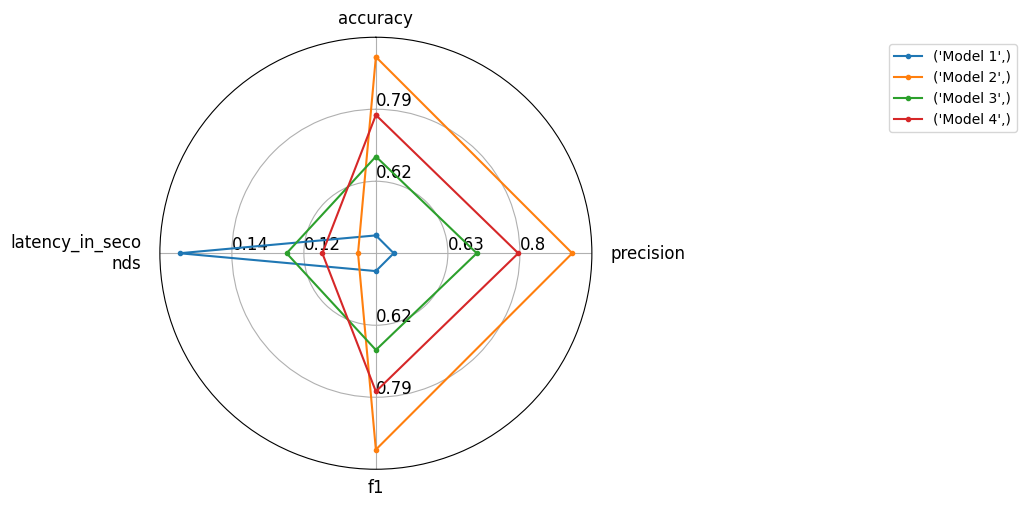

In [ ]:
from evaluate.visualization import radar_plot

data = [
    {"accuracy": 0.49, "precision": 0.50, "f1": 0.49, "latency_in_seconds": 0.15},
    {"accuracy": 0.92, "precision": 0.93, "f1": 0.92, "latency_in_seconds": 0.10},
    {"accuracy": 0.68, "precision": 0.70, "f1": 0.68, "latency_in_seconds": 0.12},
    {"accuracy": 0.78, "precision": 0.80, "f1": 0.78, "latency_in_seconds": 0.11}
]

model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()
